In [11]:
from qiskit import *
from qhomer.pngTools import *
from qiskit.chemistry import set_qiskit_chemistry_logging
import logging
import math 
from qiskit.aqua.components.optimizers import L_BFGS_B
import numpy as np
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.variational_forms import RYRZ
import logging
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.aqua.operators import MatrixOperator
def diagonalize(self, k):
   exact_eigensolver = ExactEigensolver(self, k=k)
   return(exact_eigensolver.run())
MatrixOperator.diagonalize = diagonalize

In [12]:
def HAMILTON_FUNCTION(filename):
    
    psi = rgbImage2grayVector(read(filename))
    # psi = np.sqrt(tmp)
    norm = np.linalg.norm(psi,2)
    psi0 = psi/norm
    print(psi0, "psi0")
    #nextpowerof2 = 2**(math.ceil(math.log2(len(psi0))))
    
    DiagVector = np.transpose([psi0])
    
    Hemiltonian = -(np.kron(DiagVector,psi0))
   
    print(Hemiltonian, "hemiltonian")
    
    
    HamiltOP = MatrixOperator(Hemiltonian)
    return HamiltOP

In [26]:
def QHOMER_VQE(HamiltOP, n_qubits):
   
    backend = Aer.get_backend('statevector_simulator')
    
    optimizer = L_BFGS_B(maxfun=4000)

    
    var_form = RYRZ(n_qubits, depth = 4)
    set_qiskit_chemistry_logging(logging.INFO)
    print(var_form.num_parameters)
    set_qiskit_chemistry_logging(logging.INFO)
    algorithm = VQE(HamiltOP, var_form, optimizer, operator_mode='matrix')
    
    result = algorithm.run(backend)
    
    return result


In [27]:
img = 'qhomer/Resources/test_8x8.png'
arrayofnums = rgbImage2grayVector(read(img))
num_qubits = int(math.log2(len(arrayofnums)))
Hamiltop = HAMILTON_FUNCTION(img)
RES = QHOMER_VQE(Hamiltop, num_qubits)
sv1 = RES['min_vector']
print("ground state", np.abs(sv1))

#amp1 = np.zeros(2**num_qubits)
#for i in range(2**num_qubits):
 #   amp1[i]=np.conj(sv1[i])*sv1[1]
#print(amp1)


F:\Anaconda\lib\site-packages\qiskit\aqua\algorithms\adaptive\vqe\vqe.py:105: DeprecationWarning: operator_mode option is deprecated and it will be removed after 0.6. Now the operator has its own mode, no need extra info to tell the VQE.
  "Now the operator has its own mode, no need extra info to tell the VQE.", DeprecationWarning)
2019-09-14 07:04:06,297:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: 
==================== Setting of VQE ============================
Algorithm: VQE
-- quantum_instance: None
-- var_form: <qiskit.aqua.components.variational_forms.ryrz.RYRZ object at 0x000002A184FF6748>
-- optimizer: <qiskit.aqua.components.optimizers.l_bfgs_b.L_BFGS_B object at 0x000002A185003240>
-- cost_fn: <bound method VQE._energy_evaluation of <qiskit.aqua.algorithms.adaptive.vqe.vqe.VQE object at 0x000002A1FFE600B8>>
-- initial_point: Random seed
-- callback: None
-- operator: Representation: matrix, qubits: 6, size: 64x64
-- eval_count: 0
-- aux_operators: []
-- auto_conversion: Tru

[0.16882416 0.16882416 0.16882416 0.03442689 0.023834   0.16617594
 0.16882416 0.16882416 0.16882416 0.16882416 0.10261861 0.047668
 0.05826089 0.09202572 0.16882416 0.16882416 0.16882416 0.15823127
 0.01853756 0.14234194 0.15028661 0.01588933 0.15558305 0.16882416
 0.16882416 0.07944667 0.07415022 0.16882416 0.16882416 0.08408105
 0.06620556 0.16882416 0.14499016 0.01853756 0.15823127 0.16882416
 0.16882416 0.16352772 0.02118578 0.1370455  0.05031622 0.09997039
 0.16882416 0.16882416 0.16882416 0.16882416 0.11056328 0.04237156
 0.         0.06090911 0.06355733 0.06355733 0.06355733 0.06355733
 0.06355733 0.00264822 0.10526683 0.10526683 0.10526683 0.10526683
 0.10526683 0.10526683 0.10526683 0.10526683] psi0
[[-0.0285016  -0.0285016  -0.0285016  ... -0.01777159 -0.01777159
  -0.01777159]
 [-0.0285016  -0.0285016  -0.0285016  ... -0.01777159 -0.01777159
  -0.01777159]
 [-0.0285016  -0.0285016  -0.0285016  ... -0.01777159 -0.01777159
  -0.01777159]
 ...
 [-0.01777159 -0.01777159 -0.0177

2019-09-14 07:04:25,286:qiskit.aqua.algorithms.adaptive.vq_algorithm:INFO: Starting optimizer.
bounds=[(-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.141592653589793), (-3.141592653589793, 3.1415926535897

2019-09-14 07:04:45,965:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 41 returned -0.003283232347719122
2019-09-14 07:04:46,398:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 42 returned -0.003283232328505257
2019-09-14 07:04:46,851:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 43 returned -0.0032832323553157925
2019-09-14 07:04:47,380:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 44 returned -0.0032832323773526236
2019-09-14 07:04:47,974:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 45 returned -0.0032832323321257636
2019-09-14 07:04:48,410:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 46 returned -0.003283232416492947
2019-09-14 07:04:48,790:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 47 returned -0.003283232396523512
2019-09-14 07:04:49,443:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 48 returned -0.0032832322313723662
2019-09-14 07:04:49,

2019-09-14 07:05:19,242:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 108 returned -0.005110772310032154
2019-09-14 07:05:19,892:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 109 returned -0.005110772098193435
2019-09-14 07:05:20,372:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 110 returned -0.005110772258390086
2019-09-14 07:05:20,723:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 111 returned -0.005110772336278426
2019-09-14 07:05:21,119:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 112 returned -0.005110772140002054
2019-09-14 07:05:21,506:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 113 returned -0.005110772209946174
2019-09-14 07:05:22,155:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 114 returned -0.005110772352642735
2019-09-14 07:05:22,499:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 115 returned -0.0051107722152661725
2019-09-14 07:0

2019-09-14 07:05:52,474:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 175 returned -0.008033716328867761
2019-09-14 07:05:52,940:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 176 returned -0.008033716148205628
2019-09-14 07:05:53,557:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 177 returned -0.008033716229281949
2019-09-14 07:05:54,159:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 178 returned -0.008033716162027228
2019-09-14 07:05:54,504:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 179 returned -0.008033716199538863
2019-09-14 07:05:54,894:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 180 returned -0.008033716129920059
2019-09-14 07:05:55,617:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 181 returned -0.008033716264047615
2019-09-14 07:05:56,213:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 182 returned -0.008033716181913762
2019-09-14 07:05

2019-09-14 07:06:25,816:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 242 returned -0.026751501630706897
2019-09-14 07:06:26,401:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 243 returned -0.026751501454670413
2019-09-14 07:06:26,766:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 244 returned -0.02675150149920952
2019-09-14 07:06:27,148:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 245 returned -0.18754909717613352
2019-09-14 07:06:27,774:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 246 returned -0.1875490969120784
2019-09-14 07:06:28,286:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 247 returned -0.18754909713738893
2019-09-14 07:06:28,736:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 248 returned -0.18754909689671423
2019-09-14 07:06:29,251:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 249 returned -0.1875490969044108
2019-09-14 07:06:29,818:

2019-09-14 07:06:58,308:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 310 returned -0.24438107791606475
2019-09-14 07:06:58,661:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 311 returned -0.2443810771154308
2019-09-14 07:06:59,268:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 312 returned -0.2443810782724188
2019-09-14 07:06:59,803:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 313 returned -0.2443810781083041
2019-09-14 07:07:00,347:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 314 returned -0.24438107844567852
2019-09-14 07:07:00,779:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 315 returned -0.24438107876754622
2019-09-14 07:07:01,368:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 316 returned -0.24438107782187787
2019-09-14 07:07:01,897:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 317 returned -0.24438107804821285
2019-09-14 07:07:02,355:qis

2019-09-14 07:07:32,714:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 378 returned -0.35346678552441185
2019-09-14 07:07:33,108:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 379 returned -0.35346678608853926
2019-09-14 07:07:33,676:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 380 returned -0.35346678507780455
2019-09-14 07:07:34,251:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 381 returned -0.35346678618208943
2019-09-14 07:07:34,776:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 382 returned -0.35346678665942133
2019-09-14 07:07:35,163:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 383 returned -0.35346678580895485
2019-09-14 07:07:35,578:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 384 returned -0.35346678546470933
2019-09-14 07:07:35,961:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 385 returned -0.35346678567844114
2019-09-14 07:07:36,393:

2019-09-14 07:08:03,941:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 446 returned -0.5764170124019862
2019-09-14 07:08:04,389:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 447 returned -0.5764170126433437
2019-09-14 07:08:04,917:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 448 returned -0.5764170130111973
2019-09-14 07:08:05,466:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 449 returned -0.5764170115871805
2019-09-14 07:08:06,093:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 450 returned -0.5764170121395291
2019-09-14 07:08:06,455:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 451 returned -0.576417013391831
2019-09-14 07:08:06,850:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 452 returned -0.5764170128199408
2019-09-14 07:08:07,571:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 453 returned -0.5764170122205797
2019-09-14 07:08:08,180:qiskit.aq

2019-09-14 07:08:37,916:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 514 returned -0.500032023323586
2019-09-14 07:08:38,431:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 515 returned -0.5000320222624931
2019-09-14 07:08:38,841:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 516 returned -0.5000320219340506
2019-09-14 07:08:39,231:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 517 returned -0.5000320238136411
2019-09-14 07:08:39,642:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 518 returned -0.500032024553413
2019-09-14 07:08:40,150:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 519 returned -0.500032022245034
2019-09-14 07:08:40,567:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 520 returned -0.500032022058438
2019-09-14 07:08:41,126:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 521 returned -0.5000320225714269
2019-09-14 07:08:41,717:qiskit.aqua.

2019-09-14 07:09:11,408:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 582 returned -0.6467298879317334
2019-09-14 07:09:11,995:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 583 returned -0.6467298880080323
2019-09-14 07:09:12,409:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 584 returned -0.6467298872831664
2019-09-14 07:09:12,773:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 585 returned -0.6467298885240481
2019-09-14 07:09:13,159:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 586 returned -0.6467298884359964
2019-09-14 07:09:13,848:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 587 returned -0.6467298872804512
2019-09-14 07:09:14,353:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 588 returned -0.6467298879505853
2019-09-14 07:09:14,711:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 589 returned -0.6467298887243523
2019-09-14 07:09:15,254:qiskit.a

2019-09-14 07:09:45,269:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 650 returned -0.7913353415907921
2019-09-14 07:09:45,897:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 651 returned -0.7913353415214994
2019-09-14 07:09:46,379:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 652 returned -0.7913353413353557
2019-09-14 07:09:46,823:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 653 returned -0.791335340715178
2019-09-14 07:09:47,224:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 654 returned -0.7913353412088154
2019-09-14 07:09:47,607:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 655 returned -0.7913353410455265
2019-09-14 07:09:48,017:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 656 returned -0.7913353405198785
2019-09-14 07:09:48,373:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 657 returned -0.7913353408410808
2019-09-14 07:09:48,801:qiskit.aq

2019-09-14 07:10:17,396:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 718 returned -0.8396107314626671
2019-09-14 07:10:17,918:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 719 returned -0.8396107315612674
2019-09-14 07:10:18,369:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 720 returned -0.8396107315388835
2019-09-14 07:10:18,813:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 721 returned -0.8396107317421061
2019-09-14 07:10:19,380:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 722 returned -0.8396107317694378
2019-09-14 07:10:19,947:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 723 returned -0.8396107312438159
2019-09-14 07:10:20,388:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 724 returned -0.8396107318105455
2019-09-14 07:10:20,843:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 725 returned -0.8396107308667283
2019-09-14 07:10:21,234:qiskit.a

2019-09-14 07:10:51,087:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 786 returned -0.8582288439203278
2019-09-14 07:10:51,457:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 787 returned -0.8582288441235201
2019-09-14 07:10:51,938:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 788 returned -0.8582288439684024
2019-09-14 07:10:52,302:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 789 returned -0.8582288438663451
2019-09-14 07:10:52,635:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 790 returned -0.8582288440329804
2019-09-14 07:10:53,213:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 791 returned -0.8582288439863693
2019-09-14 07:10:53,807:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 792 returned -0.8582288440365583
2019-09-14 07:10:54,370:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 793 returned -0.8582288439217031
2019-09-14 07:10:54,728:qiskit.a

2019-09-14 07:11:23,861:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 854 returned -0.8603972051495784
2019-09-14 07:11:24,428:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 855 returned -0.8615282504259129
2019-09-14 07:11:24,809:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 856 returned -0.8615282503084835
2019-09-14 07:11:25,197:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 857 returned -0.8615282503793885
2019-09-14 07:11:25,771:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 858 returned -0.8615282504718451
2019-09-14 07:11:26,288:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 859 returned -0.861528250413899
2019-09-14 07:11:26,718:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 860 returned -0.8615282505105568
2019-09-14 07:11:27,097:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 861 returned -0.8615282503731009
2019-09-14 07:11:27,501:qiskit.aq

2019-09-14 07:11:56,443:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 922 returned -0.8669932792761291
2019-09-14 07:11:56,828:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 923 returned -0.8669932793184165
2019-09-14 07:11:57,394:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 924 returned -0.8669932793930702
2019-09-14 07:11:57,930:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 925 returned -0.8669932793605495
2019-09-14 07:11:58,474:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 926 returned -0.8669932793208461
2019-09-14 07:11:58,850:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 927 returned -0.8669932792990631
2019-09-14 07:11:59,255:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 928 returned -0.8669932793621378
2019-09-14 07:11:59,827:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 929 returned -0.8669932793919115
2019-09-14 07:12:00,343:qiskit.a

2019-09-14 07:12:44,620:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 990 returned -0.8712517953975939
2019-09-14 07:12:45,656:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 991 returned -0.8712517955746972
2019-09-14 07:12:46,579:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 992 returned -0.8712517955754655
2019-09-14 07:12:47,746:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 993 returned -0.8712517954228473
2019-09-14 07:12:48,571:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 994 returned -0.8712517957759377
2019-09-14 07:12:49,643:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 995 returned -0.8712517955954125
2019-09-14 07:12:50,543:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 996 returned -0.871251795300301
2019-09-14 07:12:51,544:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 997 returned -0.8712517955290073
2019-09-14 07:12:52,548:qiskit.aq

2019-09-14 07:13:47,142:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1058 returned -0.8757970823830538
2019-09-14 07:13:48,243:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1059 returned -0.8757970823116591
2019-09-14 07:13:49,033:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1060 returned -0.8757970824164644
2019-09-14 07:13:50,271:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1061 returned -0.8757970825035657
2019-09-14 07:13:51,119:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1062 returned -0.8757970824176496
2019-09-14 07:13:52,200:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1063 returned -0.8757970823902725
2019-09-14 07:13:53,035:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1064 returned -0.8757970825229512
2019-09-14 07:13:54,276:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1065 returned -0.8757970824922279
2019-09-14 07:13:55,130:

2019-09-14 07:14:53,535:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1126 returned -0.879748483438858
2019-09-14 07:14:54,611:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1127 returned -0.8797484833640626
2019-09-14 07:14:55,451:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1128 returned -0.8797484832442011
2019-09-14 07:14:56,416:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1129 returned -0.8797484833222887
2019-09-14 07:14:57,281:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1130 returned -0.8797484834208676
2019-09-14 07:14:58,316:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1131 returned -0.8797484833503184
2019-09-14 07:14:59,268:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1132 returned -0.8797484833602516
2019-09-14 07:15:00,303:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1133 returned -0.8797484833236906
2019-09-14 07:15:01,161:q

2019-09-14 07:15:59,674:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1194 returned -0.8818336469126272
2019-09-14 07:16:00,599:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1195 returned -0.8818336468355028
2019-09-14 07:16:01,447:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1196 returned -0.8818336468651526
2019-09-14 07:16:02,457:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1197 returned -0.8818336464932749
2019-09-14 07:16:03,486:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1198 returned -0.8818336468187163
2019-09-14 07:16:04,463:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1199 returned -0.8818336468038397
2019-09-14 07:16:05,163:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1200 returned -0.8818336469306218
2019-09-14 07:16:06,240:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1201 returned -0.8818336468933609
2019-09-14 07:16:07,076:

2019-09-14 07:16:48,444:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1262 returned -0.8837305761036341
2019-09-14 07:16:48,842:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1263 returned -0.883730576191393
2019-09-14 07:16:49,442:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1264 returned -0.8837305764295419
2019-09-14 07:16:50,176:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1265 returned -0.8837305761302358
2019-09-14 07:16:50,510:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1266 returned -0.8837305761608578
2019-09-14 07:16:50,915:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1267 returned -0.883730576066567
2019-09-14 07:16:51,311:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1268 returned -0.8837305761767378
2019-09-14 07:16:51,909:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1269 returned -0.8837305761929093
2019-09-14 07:16:52,458:qi

2019-09-14 07:17:21,094:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1330 returned -0.8852953040425156
2019-09-14 07:17:21,830:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1331 returned -0.8852953040239532
2019-09-14 07:17:22,348:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1332 returned -0.8852953040467826
2019-09-14 07:17:22,695:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1333 returned -0.8852953040027196
2019-09-14 07:17:23,271:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1334 returned -0.8852953039883628
2019-09-14 07:17:23,811:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1335 returned -0.8852953040120269
2019-09-14 07:17:24,382:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1336 returned -0.8852953039713333
2019-09-14 07:17:24,733:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1337 returned -0.8852953039537498
2019-09-14 07:17:25,103:

2019-09-14 07:17:54,749:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1398 returned -0.8876277067489143
2019-09-14 07:17:55,424:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1399 returned -0.88762770686925
2019-09-14 07:17:55,987:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1400 returned -0.8876277067876513
2019-09-14 07:17:56,415:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1401 returned -0.8876277069170164
2019-09-14 07:17:56,796:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1402 returned -0.8876277068451109
2019-09-14 07:17:57,182:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1403 returned -0.8876277068967986
2019-09-14 07:17:57,847:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1404 returned -0.891116445027511
2019-09-14 07:17:58,336:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1405 returned -0.8911164451083323
2019-09-14 07:17:58,665:qis

2019-09-14 07:18:29,377:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1466 returned -0.894496906893672
2019-09-14 07:18:29,945:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1467 returned -0.8944969068824771
2019-09-14 07:18:30,394:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1468 returned -0.8944969067388737
2019-09-14 07:18:30,853:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1469 returned -0.8944969067865378
2019-09-14 07:18:31,396:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1470 returned -0.8944969069575918
2019-09-14 07:18:32,099:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1471 returned -0.8944969066625492
2019-09-14 07:18:32,496:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1472 returned -0.8944969067045082
2019-09-14 07:18:32,903:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1473 returned -0.8944969067444751
2019-09-14 07:18:33,450:q

2019-09-14 07:19:02,380:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1534 returned -0.8983494883841557
2019-09-14 07:19:02,748:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1535 returned -0.8983494884534641
2019-09-14 07:19:03,124:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1536 returned -0.8983494884982047
2019-09-14 07:19:03,502:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1537 returned -0.8983494883599337
2019-09-14 07:19:03,968:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1538 returned -0.8983494883769698
2019-09-14 07:19:04,335:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1539 returned -0.8983494884583468
2019-09-14 07:19:04,723:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1540 returned -0.8983494884941545
2019-09-14 07:19:05,270:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1541 returned -0.8983494884017442
2019-09-14 07:19:05,852:

2019-09-14 07:19:35,213:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1602 returned -0.9006079568531631
2019-09-14 07:19:35,831:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1603 returned -0.9006079565975905
2019-09-14 07:19:36,519:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1604 returned -0.9006079570280153
2019-09-14 07:19:37,015:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1605 returned -0.9006079565696765
2019-09-14 07:19:37,622:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1606 returned -0.900607956896539
2019-09-14 07:19:38,215:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1607 returned -0.9006079568883537
2019-09-14 07:19:38,546:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1608 returned -0.900607956411709
2019-09-14 07:19:38,951:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1609 returned -0.9006079568106904
2019-09-14 07:19:39,446:qi

2019-09-14 07:20:08,498:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1670 returned -0.9050613041034248
2019-09-14 07:20:08,853:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1671 returned -0.9050613040081367
2019-09-14 07:20:09,546:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1672 returned -0.905061304085009
2019-09-14 07:20:10,115:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1673 returned -0.905061304307246
2019-09-14 07:20:10,482:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1674 returned -0.9050613041684683
2019-09-14 07:20:10,851:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1675 returned -0.9050613040536931
2019-09-14 07:20:11,244:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1676 returned -0.9050613041139896
2019-09-14 07:20:11,718:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1677 returned -0.9050613040035149
2019-09-14 07:20:12,257:qi

2019-09-14 07:20:48,555:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1738 returned -0.9078150910444795
2019-09-14 07:20:49,394:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1739 returned -0.907815091048526
2019-09-14 07:20:50,382:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1740 returned -0.907815090973982
2019-09-14 07:20:51,066:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1741 returned -0.9078150909888548
2019-09-14 07:20:52,079:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1742 returned -0.9078150909423497
2019-09-14 07:20:52,749:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1743 returned -0.9078150909658778
2019-09-14 07:20:53,972:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1744 returned -0.9078150909576532
2019-09-14 07:20:54,716:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1745 returned -0.907815091067973
2019-09-14 07:20:55,725:qis

2019-09-14 07:21:38,095:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1806 returned -0.9095966199203709
2019-09-14 07:21:38,488:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1807 returned -0.9095966197834012
2019-09-14 07:21:38,863:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1808 returned -0.9095966199632894
2019-09-14 07:21:39,415:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1809 returned -0.9095966199992489
2019-09-14 07:21:40,160:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1810 returned -0.9095966198633525
2019-09-14 07:21:40,499:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1811 returned -0.9095966199248038
2019-09-14 07:21:40,873:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1812 returned -0.9095966199257238
2019-09-14 07:21:41,468:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1813 returned -0.9095966201726151
2019-09-14 07:21:42,064:

2019-09-14 07:22:12,521:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1874 returned -0.9108223233889123
2019-09-14 07:22:13,109:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1875 returned -0.9108223231146281
2019-09-14 07:22:13,694:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1876 returned -0.9108223230405526
2019-09-14 07:22:14,318:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1877 returned -0.910822323095958
2019-09-14 07:22:14,660:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1878 returned -0.9108223230518102
2019-09-14 07:22:15,211:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1879 returned -0.9108223231999663
2019-09-14 07:22:15,766:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1880 returned -0.910822323101069
2019-09-14 07:22:16,285:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1881 returned -0.910822323039565
2019-09-14 07:22:16,696:qis

2019-09-14 07:22:48,263:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1942 returned -0.9122257447042963
2019-09-14 07:22:48,619:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1943 returned -0.9122257446395712
2019-09-14 07:22:49,246:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1944 returned -0.9122257446448945
2019-09-14 07:22:49,703:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1945 returned -0.9122257446531011
2019-09-14 07:22:50,193:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1946 returned -0.9122257446555323
2019-09-14 07:22:50,566:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1947 returned -0.9122257447074523
2019-09-14 07:22:50,960:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1948 returned -0.9122257446923264
2019-09-14 07:22:51,582:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 1949 returned -0.912225744644684
2019-09-14 07:22:52,099:q

2019-09-14 07:23:19,509:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2010 returned -0.9128654104813365
2019-09-14 07:23:19,950:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2011 returned -0.9128654104999743
2019-09-14 07:23:20,308:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2012 returned -0.9128654104954063
2019-09-14 07:23:20,653:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2013 returned -0.9128654104654959
2019-09-14 07:23:21,248:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2014 returned -0.9137474555973688
2019-09-14 07:23:21,763:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2015 returned -0.9137474555476718
2019-09-14 07:23:22,294:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2016 returned -0.9137474555276186
2019-09-14 07:23:22,648:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2017 returned -0.9137474555705102
2019-09-14 07:23:23,129:

2019-09-14 07:23:50,699:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2078 returned -0.9146633274297795
2019-09-14 07:23:51,307:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2079 returned -0.9146633274094124
2019-09-14 07:23:51,749:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2080 returned -0.9146633274438244
2019-09-14 07:23:52,198:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2081 returned -0.9146633275509967
2019-09-14 07:23:52,570:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2082 returned -0.9146633273967665
2019-09-14 07:23:53,062:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2083 returned -0.9146633274365354
2019-09-14 07:23:53,684:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2084 returned -0.9146633274736445
2019-09-14 07:23:54,139:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2085 returned -0.9146633274508985
2019-09-14 07:23:54,481:

2019-09-14 07:24:35,384:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2146 returned -0.9154685442942271
2019-09-14 07:24:35,881:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2147 returned -0.9154685442933093
2019-09-14 07:24:36,307:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2148 returned -0.915468544316748
2019-09-14 07:24:36,652:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2149 returned -0.9154685443686575
2019-09-14 07:24:37,123:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2150 returned -0.9154685443214514
2019-09-14 07:24:37,585:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2151 returned -0.9154685443565858
2019-09-14 07:24:38,076:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2152 returned -0.9154685442962659
2019-09-14 07:24:38,441:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2153 returned -0.9154685442862525
2019-09-14 07:24:38,798:q

2019-09-14 07:25:17,964:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2214 returned -0.9159679371272305
2019-09-14 07:25:18,705:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2215 returned -0.9159679371023388
2019-09-14 07:25:20,193:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2216 returned -0.9159679370690749
2019-09-14 07:25:21,691:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2217 returned -0.9159679370765912
2019-09-14 07:25:22,368:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2218 returned -0.9159679367027994
2019-09-14 07:25:22,805:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2219 returned -0.9159679370936248
2019-09-14 07:25:23,624:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2220 returned -0.9159679370954532
2019-09-14 07:25:24,342:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2221 returned -0.9159679370394911
2019-09-14 07:25:25,444:

2019-09-14 07:26:10,669:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2282 returned -0.9163430837351549
2019-09-14 07:26:11,279:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2283 returned -0.9163430837030602
2019-09-14 07:26:11,936:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2284 returned -0.916343083752727
2019-09-14 07:26:12,422:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2285 returned -0.9163430837578453
2019-09-14 07:26:12,955:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2286 returned -0.9163430837675932
2019-09-14 07:26:13,558:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2287 returned -0.9163430837205214
2019-09-14 07:26:14,112:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2288 returned -0.9163430837518227
2019-09-14 07:26:14,566:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2289 returned -0.9163430837457384
2019-09-14 07:26:15,027:q

2019-09-14 07:26:44,222:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2350 returned -0.9166806766946909
2019-09-14 07:26:44,645:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2351 returned -0.9166806767293357
2019-09-14 07:26:45,155:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2352 returned -0.9166806767371002
2019-09-14 07:26:45,692:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2353 returned -0.9166806767640429
2019-09-14 07:26:46,233:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2354 returned -0.916680676726951
2019-09-14 07:26:46,673:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2355 returned -0.9166806767269522
2019-09-14 07:26:47,056:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2356 returned -0.9166806766785303
2019-09-14 07:26:47,593:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2357 returned -0.916680676780408
2019-09-14 07:26:48,093:qi

2019-09-14 07:27:27,428:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2418 returned -0.9169649295227142
2019-09-14 07:27:28,433:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2419 returned -0.9169649295305008
2019-09-14 07:27:29,100:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2420 returned -0.9169649295082563
2019-09-14 07:27:30,075:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2421 returned -0.9169649294590801
2019-09-14 07:27:31,169:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2422 returned -0.916964929506762
2019-09-14 07:27:31,918:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2423 returned -0.9169649297696262
2019-09-14 07:27:32,805:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2424 returned -0.9169649295253202
2019-09-14 07:27:33,666:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2425 returned -0.9169649295027051
2019-09-14 07:27:34,402:q

2019-09-14 07:28:12,771:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2486 returned -0.9172244036381193
2019-09-14 07:28:13,462:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2487 returned -0.9172244036318419
2019-09-14 07:28:14,527:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2488 returned -0.9172244036310225
2019-09-14 07:28:15,831:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2489 returned -0.9172244036373548
2019-09-14 07:28:16,393:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2490 returned -0.9172244036287706
2019-09-14 07:28:17,206:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2491 returned -0.9172244036381263
2019-09-14 07:28:17,959:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2492 returned -0.9172244036145433
2019-09-14 07:28:18,449:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2493 returned -0.9172244036489209
2019-09-14 07:28:18,982:

2019-09-14 07:28:52,935:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2554 returned -0.917548131007416
2019-09-14 07:28:53,546:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2555 returned -0.9175481310367858
2019-09-14 07:28:54,320:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2556 returned -0.9175481310314146
2019-09-14 07:28:54,874:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2557 returned -0.9175481310022456
2019-09-14 07:28:55,674:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2558 returned -0.9175481310337493
2019-09-14 07:28:56,336:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2559 returned -0.9175481310302341
2019-09-14 07:28:56,778:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2560 returned -0.9175481310043618
2019-09-14 07:28:57,608:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2561 returned -0.9175481310371363
2019-09-14 07:28:58,299:q

2019-09-14 07:29:37,096:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2622 returned -0.9178028490753594
2019-09-14 07:29:37,720:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2623 returned -0.9178028491322877
2019-09-14 07:29:38,245:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2624 returned -0.9180261873017691
2019-09-14 07:29:38,580:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2625 returned -0.9180261873011687
2019-09-14 07:29:39,108:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2626 returned -0.918026187307664
2019-09-14 07:29:39,635:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2627 returned -0.9180261872622535
2019-09-14 07:29:40,169:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2628 returned -0.9180261873151296
2019-09-14 07:29:40,496:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2629 returned -0.9180261873005598
2019-09-14 07:29:40,905:q

2019-09-14 07:30:38,188:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2690 returned -0.918319030717906
2019-09-14 07:30:38,643:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2691 returned -0.9183190307451594
2019-09-14 07:30:39,775:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2692 returned -0.9183190306933372
2019-09-14 07:30:40,500:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2693 returned -0.9183190307319343
2019-09-14 07:30:41,041:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2694 returned -0.9183190307267342
2019-09-14 07:30:41,721:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2695 returned -0.9183190307257858
2019-09-14 07:30:42,438:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2696 returned -0.9183190307573136
2019-09-14 07:30:43,132:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2697 returned -0.9183190307316246
2019-09-14 07:30:44,381:q

2019-09-14 07:31:33,242:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2758 returned -0.9185803050254492
2019-09-14 07:31:33,804:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2759 returned -0.9185803050818531
2019-09-14 07:31:34,598:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2760 returned -0.9185803050791934
2019-09-14 07:31:35,145:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2761 returned -0.9185803050546221
2019-09-14 07:31:36,291:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2762 returned -0.91858030505731
2019-09-14 07:31:36,878:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2763 returned -0.9185803050218742
2019-09-14 07:31:38,425:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2764 returned -0.9185803050077668
2019-09-14 07:31:39,210:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2765 returned -0.9185803050586329
2019-09-14 07:31:39,994:qi

2019-09-14 07:32:31,070:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2826 returned -0.9189823935263365
2019-09-14 07:32:32,201:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2827 returned -0.9189823935589124
2019-09-14 07:32:32,754:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2828 returned -0.918982393259094
2019-09-14 07:32:33,802:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2829 returned -0.9189823935461342
2019-09-14 07:32:34,481:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2830 returned -0.9189823934743007
2019-09-14 07:32:35,051:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2831 returned -0.9189823935460383
2019-09-14 07:32:36,199:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2832 returned -0.9189823935093472
2019-09-14 07:32:36,776:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2833 returned -0.9189823935554804
2019-09-14 07:32:37,883:q

2019-09-14 07:33:28,209:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2894 returned -0.9192969854151181
2019-09-14 07:33:28,693:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2895 returned -0.9192969855142916
2019-09-14 07:33:29,291:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2896 returned -0.9192969854665592
2019-09-14 07:33:29,860:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2897 returned -0.9192969854962578
2019-09-14 07:33:30,545:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2898 returned -0.9192969854590167
2019-09-14 07:33:31,150:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2899 returned -0.9192969855260478
2019-09-14 07:33:31,790:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2900 returned -0.9192969855135933
2019-09-14 07:33:32,371:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2901 returned -0.9192969855067225
2019-09-14 07:33:32,946:

2019-09-14 07:34:19,628:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2962 returned -0.9196740718086132
2019-09-14 07:34:20,506:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2963 returned -0.9196740718076268
2019-09-14 07:34:21,077:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2964 returned -0.9196740717802585
2019-09-14 07:34:22,169:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2965 returned -0.9196740717981763
2019-09-14 07:34:22,678:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2966 returned -0.9196740718111491
2019-09-14 07:34:23,870:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2967 returned -0.9196740718076379
2019-09-14 07:34:24,711:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2968 returned -0.9196740717895011
2019-09-14 07:34:25,298:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 2969 returned -0.919674071772349
2019-09-14 07:34:25,902:q

2019-09-14 07:35:32,300:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3030 returned -0.9200640693979489
2019-09-14 07:35:32,824:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3031 returned -0.9200640694189399
2019-09-14 07:35:34,035:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3032 returned -0.9200640694235667
2019-09-14 07:35:34,774:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3033 returned -0.9200640695812939
2019-09-14 07:35:36,065:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3034 returned -0.920064069391155
2019-09-14 07:35:36,635:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3035 returned -0.9200640694281981
2019-09-14 07:35:38,253:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3036 returned -0.9200640693811671
2019-09-14 07:35:38,768:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3037 returned -0.9200640693912042
2019-09-14 07:35:39,471:q

2019-09-14 07:36:29,979:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3098 returned -0.9204500867293168
2019-09-14 07:36:30,689:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3099 returned -0.9204500867890814
2019-09-14 07:36:31,811:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3100 returned -0.9204500867318406
2019-09-14 07:36:32,563:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3101 returned -0.9204500867023372
2019-09-14 07:36:33,796:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3102 returned -0.920450086707309
2019-09-14 07:36:34,641:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3103 returned -0.9204500867728191
2019-09-14 07:36:35,761:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3104 returned -0.9204500867404426
2019-09-14 07:36:36,488:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3105 returned -0.9204500867545246
2019-09-14 07:36:37,081:q

2019-09-14 07:37:24,796:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3166 returned -0.9211278538261248
2019-09-14 07:37:25,963:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3167 returned -0.9211278538360803
2019-09-14 07:37:26,611:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3168 returned -0.921127853803987
2019-09-14 07:37:27,150:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3169 returned -0.9211278538887684
2019-09-14 07:37:27,752:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3170 returned -0.9211278538899447
2019-09-14 07:37:28,634:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3171 returned -0.9211278538040388
2019-09-14 07:37:29,834:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3172 returned -0.9211278538916935
2019-09-14 07:37:30,485:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3173 returned -0.9218280192065214
2019-09-14 07:37:31,036:q

2019-09-14 07:38:26,848:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3234 returned -0.9229269172558463
2019-09-14 07:38:27,395:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3235 returned -0.9229269171991806
2019-09-14 07:38:27,921:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3236 returned -0.9229269172861012
2019-09-14 07:38:28,342:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3237 returned -0.9229269172182494
2019-09-14 07:38:28,794:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3238 returned -0.9229269172520103
2019-09-14 07:38:29,201:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3239 returned -0.9229269171888043
2019-09-14 07:38:29,590:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3240 returned -0.922926917346754
2019-09-14 07:38:29,963:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3241 returned -0.9229269171231034
2019-09-14 07:38:30,391:q

2019-09-14 07:39:03,459:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3302 returned -0.924132376092011
2019-09-14 07:39:04,146:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3303 returned -0.924132376274834
2019-09-14 07:39:04,606:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3304 returned -0.9241323762138353
2019-09-14 07:39:05,217:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3305 returned -0.9241323762906376
2019-09-14 07:39:05,911:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3306 returned -0.9241323762176238
2019-09-14 07:39:06,399:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3307 returned -0.9241323761797112
2019-09-14 07:39:06,801:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3308 returned -0.9241323763456651
2019-09-14 07:39:07,630:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3309 returned -0.9241323763444698
2019-09-14 07:39:08,255:qi

2019-09-14 07:39:44,431:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3370 returned -0.9254526265300366
2019-09-14 07:39:44,829:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3371 returned -0.925452626430067
2019-09-14 07:39:45,422:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3372 returned -0.9254526265183761
2019-09-14 07:39:46,063:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3373 returned -0.9254526265591557
2019-09-14 07:39:46,449:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3374 returned -0.9254526263918923
2019-09-14 07:39:46,900:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3375 returned -0.9254526265549045
2019-09-14 07:39:47,340:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3376 returned -0.9254526265017778
2019-09-14 07:39:48,113:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3377 returned -0.9254526261378885
2019-09-14 07:39:48,570:q

2019-09-14 07:41:02,513:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3438 returned -0.9262466186214707
2019-09-14 07:41:03,140:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3439 returned -0.926246618995982
2019-09-14 07:41:03,852:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3440 returned -0.9262466189768206
2019-09-14 07:41:04,573:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3441 returned -0.9262466189882387
2019-09-14 07:41:05,479:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3442 returned -0.9262466190068763
2019-09-14 07:41:06,267:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3443 returned -0.9262466189758972
2019-09-14 07:41:06,743:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3444 returned -0.9262466189467531
2019-09-14 07:41:07,314:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3445 returned -0.9262466189812133
2019-09-14 07:41:08,046:q

2019-09-14 07:41:53,437:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3506 returned -0.9270767751868265
2019-09-14 07:41:54,669:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3507 returned -0.9270767752088955
2019-09-14 07:41:56,360:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3508 returned -0.9270767751603968
2019-09-14 07:41:56,980:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3509 returned -0.9270767751766769
2019-09-14 07:41:57,856:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3510 returned -0.9270767751908472
2019-09-14 07:41:58,501:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3511 returned -0.9270767751760026
2019-09-14 07:41:59,493:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3512 returned -0.9270767751623801
2019-09-14 07:42:00,266:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3513 returned -0.9270767752140381
2019-09-14 07:42:00,870:

2019-09-14 07:43:08,642:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3574 returned -0.9273970348594741
2019-09-14 07:43:10,625:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3575 returned -0.9273970349643148
2019-09-14 07:43:12,255:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3576 returned -0.9273970347451296
2019-09-14 07:43:12,873:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3577 returned -0.9273970347082212
2019-09-14 07:43:14,244:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3578 returned -0.9273970348942835
2019-09-14 07:43:14,767:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3579 returned -0.9273970348120714
2019-09-14 07:43:15,495:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3580 returned -0.9273970348431007
2019-09-14 07:43:16,642:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3581 returned -0.9273970348636825
2019-09-14 07:43:17,626:

2019-09-14 07:44:26,648:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3642 returned -0.9283588360048934
2019-09-14 07:44:27,639:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3643 returned -0.9283588360727855
2019-09-14 07:44:28,596:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3644 returned -0.9283588360090678
2019-09-14 07:44:29,792:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3645 returned -0.9283588360454498
2019-09-14 07:44:30,501:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3646 returned -0.9283588359727908
2019-09-14 07:44:32,672:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3647 returned -0.9283588359371241
2019-09-14 07:44:35,081:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3648 returned -0.9283588359952627
2019-09-14 07:44:36,337:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3649 returned -0.9283588360466166
2019-09-14 07:44:36,943:

2019-09-14 07:45:52,448:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3710 returned -0.9291555263866977
2019-09-14 07:45:54,168:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3711 returned -0.929155526358678
2019-09-14 07:45:56,064:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3712 returned -0.9291555263538875
2019-09-14 07:45:57,091:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3713 returned -0.9291555263891653
2019-09-14 07:45:58,969:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3714 returned -0.9291555263128453
2019-09-14 07:46:00,093:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3715 returned -0.9291555264087905
2019-09-14 07:46:00,550:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3716 returned -0.9291555263175528
2019-09-14 07:46:01,869:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3717 returned -0.9291555263211637
2019-09-14 07:46:03,081:q

2019-09-14 07:46:47,922:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3778 returned -0.9304093505911574
2019-09-14 07:46:48,998:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3779 returned -0.9304093505661519
2019-09-14 07:46:50,998:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3780 returned -0.930409350582619
2019-09-14 07:46:53,372:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3781 returned -0.9304093505897431
2019-09-14 07:46:54,774:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3782 returned -0.9304093506571329
2019-09-14 07:46:56,361:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3783 returned -0.9321850217233616
2019-09-14 07:46:56,821:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3784 returned -0.9321850216404577
2019-09-14 07:46:58,017:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3785 returned -0.9321850217857071
2019-09-14 07:46:58,687:q

2019-09-14 07:47:38,435:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3846 returned -0.9331935348140805
2019-09-14 07:47:38,976:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3847 returned -0.9331935348508518
2019-09-14 07:47:39,795:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3848 returned -0.9331935347015969
2019-09-14 07:47:40,440:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3849 returned -0.9331935347496103
2019-09-14 07:47:40,883:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3850 returned -0.9331935347561154
2019-09-14 07:47:41,348:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3851 returned -0.9331935346639515
2019-09-14 07:47:42,288:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3852 returned -0.9331935347759353
2019-09-14 07:47:42,695:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3853 returned -0.9331935347689767
2019-09-14 07:47:43,510:

2019-09-14 07:48:21,607:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3914 returned -0.9341009198943648
2019-09-14 07:48:22,415:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3915 returned -0.9341009198598946
2019-09-14 07:48:22,868:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3916 returned -0.9341009198886069
2019-09-14 07:48:23,713:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3917 returned -0.9341009198795333
2019-09-14 07:48:24,377:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3918 returned -0.934100919852822
2019-09-14 07:48:24,933:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3919 returned -0.9341009198501247
2019-09-14 07:48:25,720:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3920 returned -0.9341009198053951
2019-09-14 07:48:26,358:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3921 returned -0.9341009199173784
2019-09-14 07:48:26,807:q

2019-09-14 07:49:04,387:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3982 returned -0.9346244165138811
2019-09-14 07:49:04,849:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3983 returned -0.9346244164455908
2019-09-14 07:49:05,663:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3984 returned -0.9346244164983467
2019-09-14 07:49:06,331:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3985 returned -0.9346244164532092
2019-09-14 07:49:06,872:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3986 returned -0.9346244165284401
2019-09-14 07:49:07,712:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3987 returned -0.9346244165292008
2019-09-14 07:49:08,389:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3988 returned -0.9346244165235144
2019-09-14 07:49:08,846:qiskit.aqua.algorithms.adaptive.vqe.vqe:INFO: Energy evaluation 3989 returned -0.934624416407389
2019-09-14 07:49:09,671:q

ground state [0.16339434 0.2059311  0.13848479 0.04971877 0.04826296 0.17114241
 0.20167237 0.16081492 0.19552867 0.20874632 0.10713931 0.05698786
 0.06177187 0.10995563 0.18081569 0.20024405 0.17822497 0.07047619
 0.07420363 0.13913948 0.15680896 0.04983748 0.10768393 0.14222039
 0.16626485 0.09475895 0.07848685 0.12218547 0.12911201 0.06972901
 0.11032922 0.15685001 0.10099255 0.03447292 0.10576195 0.17962802
 0.13659981 0.14649998 0.05374647 0.10369338 0.08630134 0.07402297
 0.16100462 0.16403682 0.15751123 0.17207479 0.09021899 0.09908886
 0.06463195 0.09697188 0.1230653  0.07381221 0.09300803 0.09657563
 0.11144123 0.01905365 0.0786687  0.0976193  0.12684316 0.08720994
 0.10758327 0.1131481  0.10680542 0.04981236]


In [28]:
RES1 = Hamiltop.diagonalize(4)
print(RES1["eigvecs"])

[[ 1.68824163e-01+0.j          1.68824163e-01+0.j
   1.68824163e-01+0.j          3.44268885e-02+0.j
   2.38340005e-02+0.j          1.66175941e-01+0.j
   1.68824163e-01+0.j          1.68824163e-01+0.j
   1.68824163e-01+0.j          1.68824163e-01+0.j
   1.02618613e-01+0.j          4.76680011e-02+0.j
   5.82608891e-02+0.j          9.20257246e-02+0.j
   1.68824163e-01+0.j          1.68824163e-01+0.j
   1.68824163e-01+0.j          1.58231275e-01+0.j
   1.85375553e-02+0.j          1.42341943e-01+0.j
   1.50286609e-01+0.j          1.58893333e-02+0.j
   1.55583053e-01+0.j          1.68824163e-01+0.j
   1.68824163e-01+0.j          7.94466651e-02+0.j
   7.41502211e-02+0.j          1.68824163e-01+0.j
   1.68824163e-01+0.j          8.40810536e-02+0.j
   6.62055551e-02+0.j          1.68824163e-01+0.j
   1.44990165e-01+0.j          1.85375553e-02+0.j
   1.58231275e-01+0.j          1.68824163e-01+0.j
   1.68824163e-01+0.j          1.63527719e-01+0.j
   2.11857785e-02+0.j          1.37045499e-01+0.j


<class 'numpy.ndarray'>
1.7320508075688816


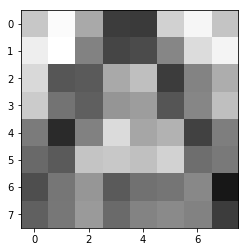

In [29]:
newimg = np.array(grayVector2rgbImage(np.abs(sv1)))
print(type(newimg))
maxnormofpic = np.linalg.norm(newimg)
print(maxnormofpic)
show(newimg/np.max(np.abs(newimg)))

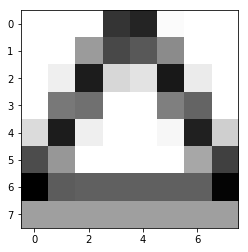

In [25]:
show(read(img))